<a href="https://colab.research.google.com/github/rohitkhadka1/AI-ML-DS/blob/main/Student_Marks_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
file = files.upload()

Saving student_marks_data.csv to student_marks_data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('student_marks_data.csv')
df.head()

,Hours_Studied,Marks
0,4.370861,22.742810
1,9.556429,41.105422
2,7.587945,39.840717
3,6.387926,34.992561
4,2.404168,14.819791


In [4]:
df.dtypes


,0
Hours_Studied,float64
Marks,float64


In [5]:
df.describe()

,Hours_Studied,Marks
count,1000.000000,1000.000000
mean,5.412309,27.556024
std,2.629236,13.832111
min,1.041688,-4.946968
25%,3.123759,16.021435
50%,5.471266,27.743061
75%,7.698876,38.856977
max,9.997459,60.523014


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Hours_Studied  1000 non-null   float64
 1   Marks          1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [7]:
df['Marks'] = np.where(df['Marks'] < 0, 0, df['Marks'])
df.describe()

,Hours_Studied,Marks
count,1000.000000,1000.000000
mean,5.412309,27.572233
std,2.629236,13.797500
min,1.041688,0.000000
25%,3.123759,16.021435
50%,5.471266,27.743061
75%,7.698876,38.856977
max,9.997459,60.523014


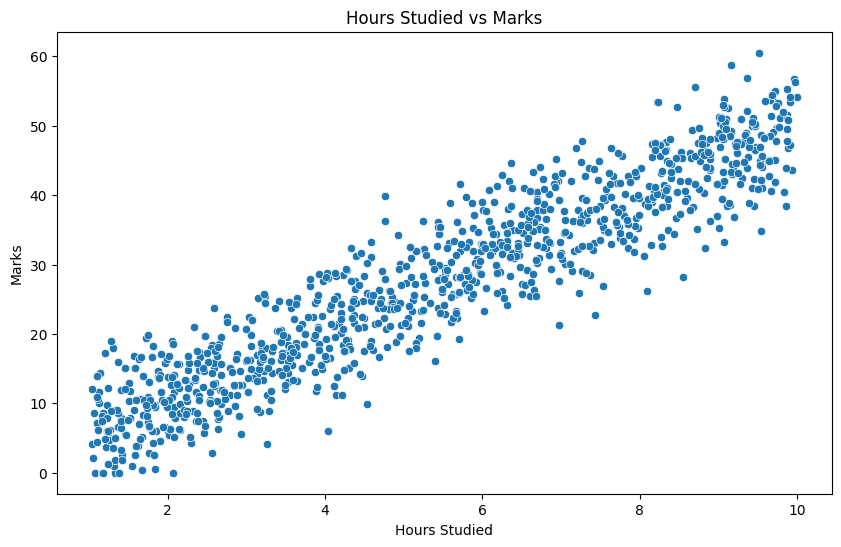

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hours_Studied', y='Marks', data=df)
plt.xlabel('Hours Studied')
plt.ylabel('Marks')
plt.title('Hours Studied vs Marks')
plt.show()

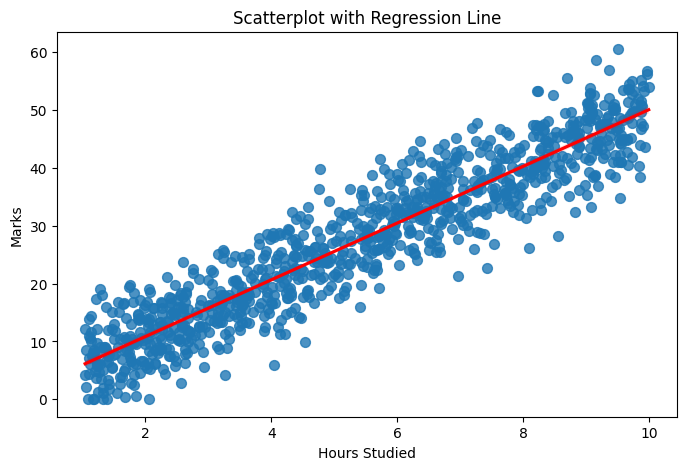

In [9]:
plt.figure(figsize = (8,5))
sns.regplot(x='Hours_Studied', y='Marks', data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Scatterplot with Regression Line')
plt.xlabel('Hours Studied')
plt.ylabel('Marks')
plt.show()

Text(0.5, 1.0, 'Distribution of Hours Studied')

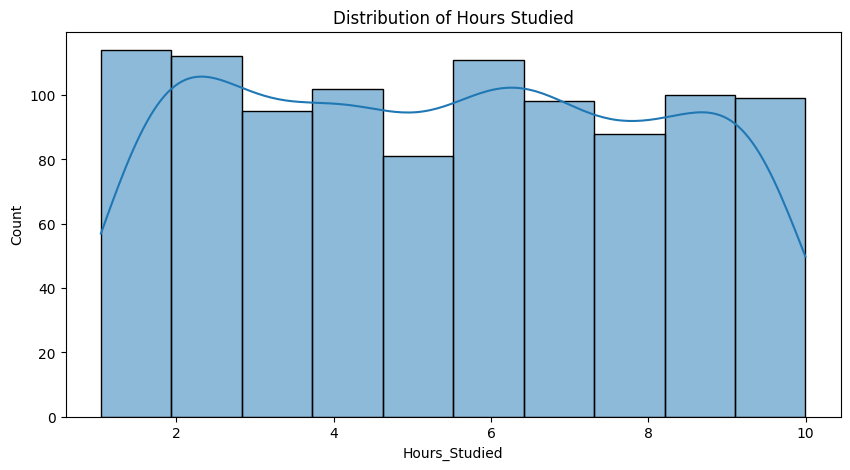

In [10]:
plt.figure(figsize=(10, 5))
# plt.subplot(1, 2, 1)
sns.histplot(df['Hours_Studied'], bins=10, kde=True)
plt.title('Distribution of Hours Studied')

# Histogram for Marks


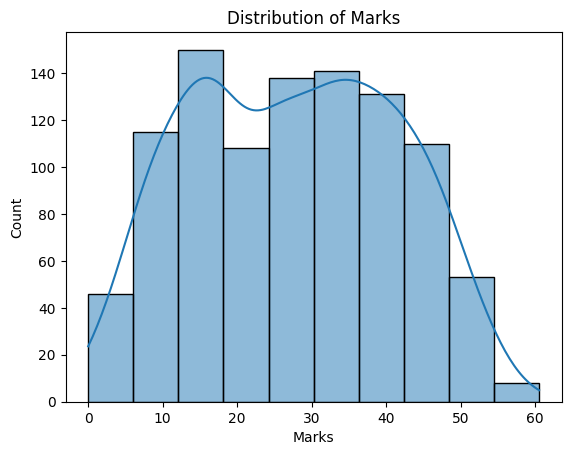

In [11]:
# plt.subplot(1, 2, 2)
sns.histplot(df['Marks'], bins=10, kde=True)
plt.title('Distribution of Marks')
plt.show()

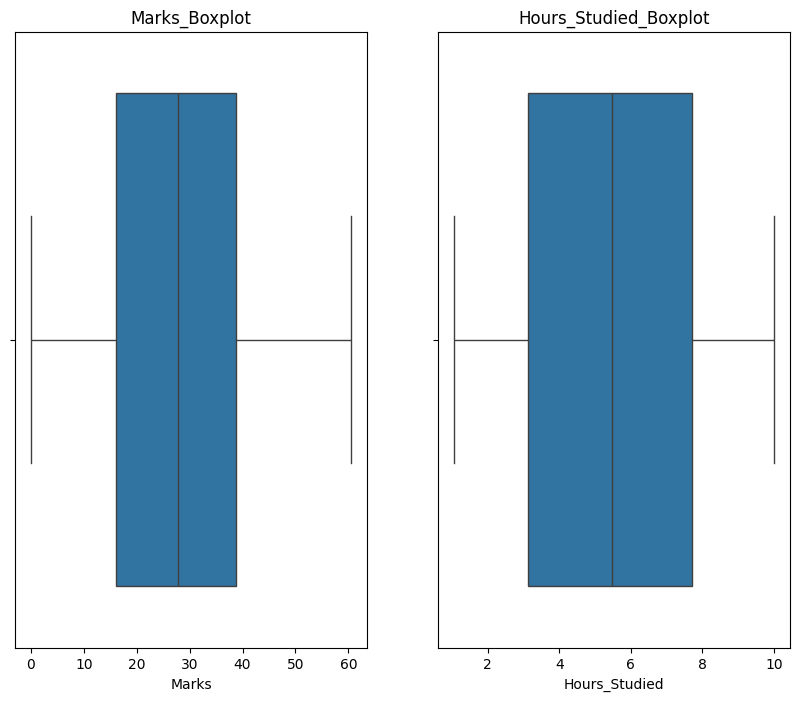

In [12]:
plt.figure(figsize = (10,8))
plt.subplot(1,2,1)
sns.boxplot(x = "Marks", data = df)
plt.title("Marks_Boxplot")
plt.show

plt.subplot(1,2,2)
sns.boxplot(x = "Hours_Studied", data = df)
plt.title("Hours_Studied_Boxplot")
plt.show()

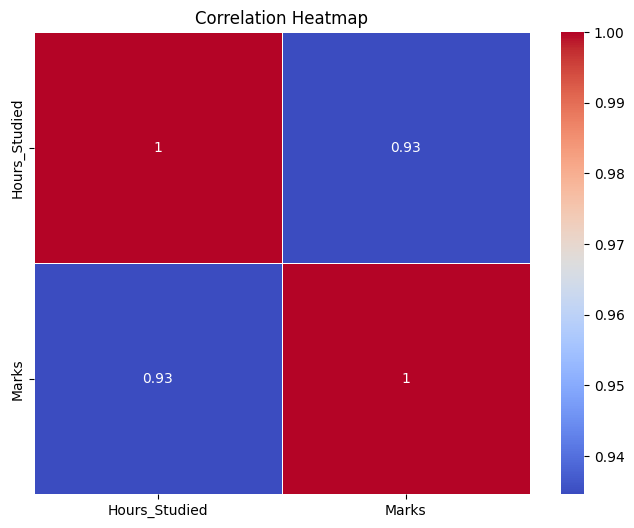

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [17]:
X = df[['Hours_Studied']]
y = df['Marks']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state = 42 )


In [21]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = model.score(X_test, y_test)
print("Accuracy:", acc)
mean_squared_error = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mean_squared_error)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Accuracy: 0.8871362967691862
Mean Squared Error: 20.98619971824443
R-squared: 0.8871362967691862


In [22]:
print(f"Model Coefficient: {model.coef_[0]}")
print(f"Model Intercept: {model.intercept_}")

Model Coefficient: 4.894069364456552
Model Intercept: 1.105876472003061


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1475: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))
/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:897: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:757: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1477: FutureWarni

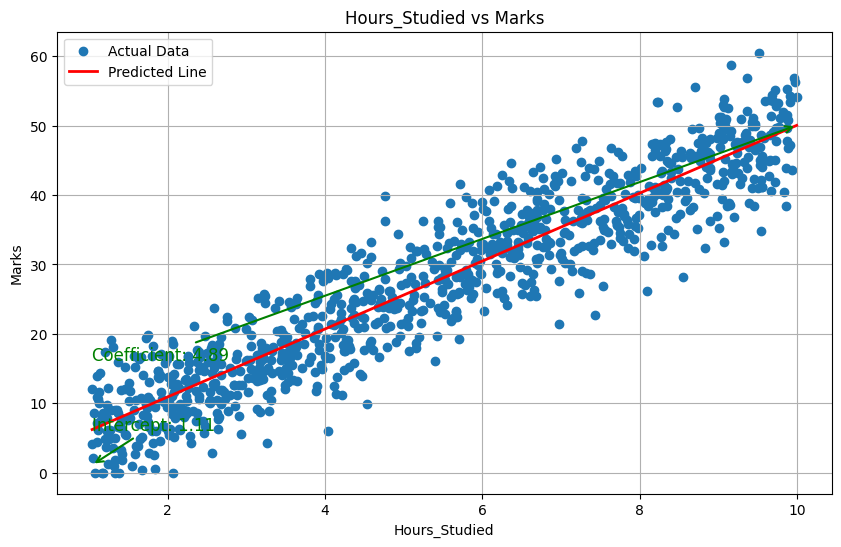

In [26]:
#Visualization
plt.figure(figsize = (10,6))
plt.scatter(X,y, label = "Actual Data")

X_range = np.linspace(X.min(), X.max(), 100)
y_range = model.predict(X_range.reshape(-1,1))
plt.plot(X_range, y_range, color = "red", label = "Predicted Line", linewidth = 2)
plt.xlabel("Hours_Studied")
plt.ylabel("Marks")
plt.title("Hours_Studied vs Marks")
plt.annotate(f'Intercept: {model.intercept_:.2f}', xy = (X.min(), model.intercept_ ),  xytext=(X.min(), model.intercept_ + 5), arrowprops=dict(arrowstyle='->', lw=1.5, color='green'), fontsize=12, color='green')
plt.annotate(f'Coefficient: {model.coef_[0]:.2f}', xy = (X.max(), model.coef_[0] * X.max() + model.intercept_),xytext=(X.min(), model.coef_[0] * X.min() + model.intercept_ + 10), arrowprops=dict(arrowstyle='->', lw=1.5, color='green'), fontsize=12, color='green')
plt.legend()
plt.grid()
plt.show()

